<a href="https://colab.research.google.com/github/sabaansari9183/Machine-learning-projects-/blob/main/Vehicle_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1002 non-null   object 
 1   description     946 non-null    object 
 2   make            1002 non-null   object 
 3   model           1002 non-null   object 
 4   year            1002 non-null   int64  
 5   price           979 non-null    float64
 6   engine          1000 non-null   object 
 7   cylinders       897 non-null    float64
 8   fuel            995 non-null    object 
 9   mileage         968 non-null    float64
 10  transmission    1000 non-null   object 
 11  trim            1001 non-null   object 
 12  body            999 non-null    object 
 13  doors           995 non-null    float64
 14  exterior_color  997 non-null    object 
 15  interior_color  964 non-null    object 
 16  drivetrain      1002 non-null   object 
dtypes: float64(4), int64(1), object(1

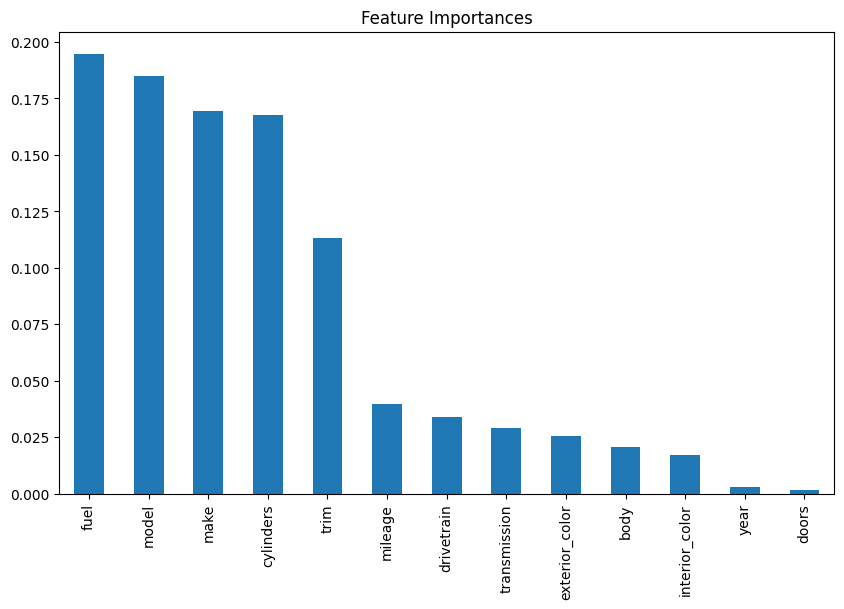

Linear Regression Accuracy: 30.87%
Random Forest Accuracy: 76.26%


In [ ]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Step 2: Load dataset
df = pd.read_csv('/content/dataset.csv')  # <-- Adjust path if needed

# Check missing values and datatypes
print(df.info())
print("\nMissing values:\n", df.isnull().sum())

# Step 3: Data Cleaning and Preprocessing

# Drop columns that are too descriptive or redundant
df = df.drop(['name', 'description', 'engine'], axis=1)

# Drop rows with missing price (target variable)
df = df[df['price'].notnull()]

# Fill missing numerical features with median
df['mileage'] = df['mileage'].fillna(df['mileage'].median())
df['cylinders'] = df['cylinders'].fillna(df['cylinders'].median())
df['doors'] = df['doors'].fillna(df['doors'].median())

# Fill missing categorical features with mode
for col in ['make', 'model', 'fuel', 'transmission', 'trim', 'body', 'exterior_color', 'interior_color', 'drivetrain']:
    df[col] = df[col].fillna(df[col].mode()[0])

# Use Label Encoding for simplicity on cleaned data
cat_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Step 4: Prepare data for modeling
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train and Evaluate Models
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Linear Regression R2 Score:", r2_score(y_test, y_pred_lr))

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest R2 Score:", r2_score(y_test, y_pred_rf))

print("Random Forest MAE:", mean_absolute_error(y_test, y_pred_rf))
print("Linear Regression MAE:", mean_absolute_error(y_test, y_pred_lr))

# Step 6: Feature importance (Random Forest)
plt.figure(figsize=(10,6))
feat_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
feat_imp.plot(kind='bar')
plt.title("Feature Importances")
plt.show()


print("Linear Regression Accuracy: {:.2f}%".format(r2_score(y_test, y_pred_lr) * 100))
print("Random Forest Accuracy: {:.2f}%".format(r2_score(y_test, y_pred_rf) * 100))